In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.optimizers import RMSprop, SGD
#from tensorflow.keras import regularizers 
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import max_norm

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

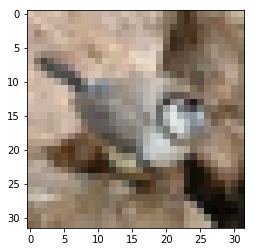

In [4]:
plt.imshow(x_train[90])

In [5]:
y_test.shape

(10000, 1)

In [6]:
x_train=x_train.reshape(50000, 32,32,3)
x_test=x_test.reshape(10000,32, 32,3)

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
y_test[9]

array([1])

In [10]:
classes=10
y_train=keras.utils.to_categorical(y_train,classes)
y_test=keras.utils.to_categorical(y_test,classes)

In [11]:
y_test[68]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,batch_size=64,epochs=50,verbose=1,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 584s 12ms/step - loss: 1.6063 - acc: 0.4171 - val_loss: 1.2730 - val_acc: 0.5644
Epoch 2/50
50000/50000 [==============================] - 552s 11ms/step - loss: 1.2919 - acc: 0.5396 - val_loss: 1.1362 - val_acc: 0.6070
Epoch 3/50
50000/50000 [==============================] - 543s 11ms/step - loss: 1.1815 - acc: 0.5830 - val_loss: 1.0092 - val_acc: 0.6521
Epoch 4/50
50000/50000 [==============================] - 706s 14ms/step - loss: 1.1107 - acc: 0.6070 - val_loss: 0.9719 - val_acc: 0.6592
Epoch 5/50
50000/50000 [==============================] - 565s 11ms/step - loss: 1.0473 - acc: 0.6294 - val_loss: 0.9486 - val_acc: 0.6673
Epoch 6/50
50000/50000 [==============================] - 563s 11ms/step - loss: 0.9936 - acc: 0.6488 - val_loss: 0.9149 - val_acc: 0.6785
Epoch 7/50
50000/50000 [==============================] - 584s 12ms/step - loss: 0.9414 - acc: 0.6671 - val_loss: 0.